<center> 
<h1> Mehrgittermethoden </h1> 
<h2> Übungsaufgaben </h2>
<h3> Robert Speck & Dieter Moser, Sommersemester 2016 </h3>
</center>
___


### Das Kroneckerprodukt

Ist $A$ eine $m\times n$-Matrix und $B$ eine $p\times r$-Matrix, so ist das Kronecker-Produkt $C = A \otimes B$ definiert als
    $$C = (a_{ij} \cdot B) =\begin{pmatrix} a_{11} B & \cdots & a_{1n} B \\ \vdots & \ddots & \vdots \\ a_{m1} B & \cdots & a_{mn} B \end{pmatrix}.$$
    
1. Ist das Kronecker-Produkt kommutativ?

1. Zeigen Sie: 

    1. $A\otimes (B+C)=A\otimes B+A\otimes C $
    
    1. $AC\otimes BD=(A\otimes B)(C\otimes D)$
    
    1. $\mathrm{Spur}(A \otimes B) = \mathrm{Spur}(A) \cdot \mathrm{Spur}(B)$

1. Zeigen Sie: 

    1. Sind $\{\lambda_i\}_{i=1..n}$ die Eigenwerte von $A$ und $\{\mu_j\}_{j=1..m}$ die Eigenwerte von $B$ dann sind    $\{\lambda_i \, \mu_j\}_{i=1..n \atop j=1..m}$ die Eigenwerte von $A \otimes B$.

    1. Für die Spektralnorm gilt $\| A \otimes B \|_2 = \| A \|_2 \cdot \| B \|_2$. 

    1. Sind $A,B$ invertierbar, so ist die Inverse $(A\otimes B)^{-1}=A^{-1} \otimes B^{-1}$. 
---

### Das Gauß-Seidel-Verfahren
Hier werden Sie zum ersten Mal das *pyMG*-Framework erweitern. Implementieren Sie Ihre Verfahren im Ordner *project* und nutzen Sie unter allen Umständen die vorgegebenen Klassen aus dem Ordner *pymg*. Zur Beantwortung von Fragen mit Code-Unterstützung (wie Teilaufgabe 1) arbeiten Sie bitte direkt in diesem Jupyter Notebook, evtl. mit Unterstützung von eigenen Skripten aus dem *bin* Ordner.   

1. Implementieren Sie das Gauß-Seidel-Verfahren und wenden Sie es für das Modellproblem $-\Delta u = 0$ mit $N=63$ Freiheitsgraden an. Nutzen Sie dazu als Anfangswerte die Fourier-Moden $w_2$ und $w_{16}$ sowie $(w_2+w_{16})/2$. Plotten Sie jeweils die Lösung nach 1 und nach 10 Iterationen und erklären Sie die Ergebnisse.
1. Dokumentieren Sie den Code mit Hilfe des Sphinx-Frameworks (siehe Readme).

Erstellen Sie einen Release (welches auch das bearbeitete Notebook enthält) und reichen Sie den Link zum Release ein. Bei Einreichung wird dieses Notebook ausgeführt und erzeugt eine html-Version, die dann zur Korrektur genutzt wird. Achten Sie daher darauf, dass das Notebook ohne Fehler ausführbar ist und alle gewünschten Lösungen/Erklärungen enthält. 

Zur Bewertung dieser Aufgabe werden das Notebook, die Dokumentation und die Commit-Messages einbegezogen.

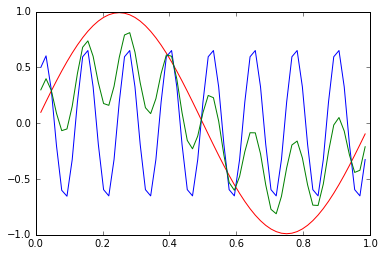

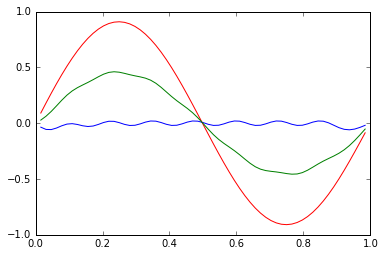

In [10]:
%matplotlib inline
from project.poisson1d import Poisson1D
from project.gaussseidel import GaussSeidel
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ndofs = 63
prob = Poisson1D(ndofs)
gs = GaussSeidel(prob.A, 1)
 
 
xvalues = np.array([(i + 1) * prob.dx for i in range(prob.ndofs)])
rhs = np.sin(0 * xvalues) # zeros(prob.ndofs)

u2 = np.sin(2 * np.pi * xvalues)
u16 = np.sin(16 * np.pi * xvalues)
u216 = (u2 + u16) / 2
for i in range(10):
    u2 = gs.smooth(rhs, u2)
    u16 = gs.smooth(rhs, u16)
    u216 = gs.smooth(rhs, u216)
    if i == 0 or i == 9:
        plt.plot(xvalues,u2,color='red')
        plt.plot(xvalues,u16,color='blue')
        plt.plot(xvalues,u216,color='green')
        plt.show()

In rot: Mode 2 : glatte Mode wird schlecht dedämpft
In blau: Mode 16 : hochfrequente Mode wird gut dedämpft
In grün: Mischung der beiden Moden : Wird einigermaßen gedämpft ( der M2 Anteil schlecht, der M16 Anteil gut... )
Man sieht auch die Linearität : grün=rot/2+blau/2

5
